# Analysis of Kenya Energy Statistics

#H0:in the 5 year period from 2010 to 2015, there has been an increase in the percentage of electricity produced from green sources. 
#H1:in the 5 year period from 2010 to 2015, there has not been an increase in the percentage of electricity produced from green sources. 

## Importing Libraries to be used 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and reading the dataset

In [2]:
data = '/home/kuria/Documents/african-regional-energy-statistics-2014-xlsx-1.xls'
df1 = pd.read_excel(data)
df1.head()

,Indicator,IndicatorName,Region,RegionName,Unit,Date,Value
0,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2006,11.0
1,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2007,6.0
2,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2008,15.0
3,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2009,25.0
4,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2010,50.0


## Previewing and Inspecting the dataset

In [3]:
df1['IndicatorName'].unique()

array(['Final Consumption of coking coal, 1000 tonnes',
       'Consumption of coking coal in industry , 1000 tonnes',
       'Net imports of coking coal, 1000 tonnes',
       'Production of charcoal, 1000 tonnes',
       'Final consumption of Charcoal ( 1000 tonnes )',
       'Production of Coal (1000 tonnes)',
       'Production of crude oil, NLG and additives, 1000 tonnes',
       'Refinery output of oil products, 1000 tonnes',
       'Final consumption of oil, 1000 tonnes',
       'Consumption of oil in industry, 1000 tonnes',
       'Consommation de pétrole dans les transports, 1000 tonnes',
       'Net imports of crude oil, NGL, refinery feedstocks and additives, 1000 tonnes',
       'Net imports of oil products, 1000 tonnes',
       'Production of natural gas, Tj',
       'Final consumption of natural gas, Tj',
       'Consumption of natural gas in industry, Tj',
       'Net imports of natural gas, Tj',
       'Production of electricity from biofuels and waste, GWh',
       'Pro

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17018 entries, 0 to 17017
Data columns (total 7 columns):
Indicator        17018 non-null int64
IndicatorName    17018 non-null object
Region           17018 non-null int64
RegionName       17018 non-null object
Unit             17018 non-null object
Date             17018 non-null int64
Value            17018 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 930.8+ KB


In [5]:
df1.shape

(17018, 7)

In [8]:
df['RegionName'].unique()

array(['Ethiopia', 'Kenya', 'Tanzania', 'Algeria', 'Egypt', 'Morocco',
       'Tunisia', 'Botswana', 'Madagascar', 'Malawi', 'Mauritius',
       'Mozambique', 'Namibia', 'South Africa', 'Swaziland', 'Zambia',
       'Zimbabwe', 'Niger', 'Nigeria', 'Senegal', 'Africa', 'Togo',
       'Angola', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo, Rep.', 'Congo, Dem. Rep.', 'Equatorial Guinea', 'Rwanda',
       'Djibouti', 'Eritrea', 'Somalia', 'Uganda', 'Libya', 'Lesotho',
       'Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Sudan', 'Gabon',
       'South Sudan', 'Mauritania', 'Burundi', 'Sao Tome and Principe',
       'Comoros', 'Seychelles', 'Gambia', 'Sierra Leone', 'East Africa',
       'West Africa', 'North Africa', 'Southern Africa', 'Central Africa',
       'Saharawi Republic'], dtype=object)

In [9]:
df1.tail()

,Indicator,IndicatorName,Region,RegionName,Unit,Date,Value
17013,21773673,Production of Firewood (1000 tonnes),1,Africa,thousand tonnes,2010,666808.970223
17014,21773673,Production of Firewood (1000 tonnes),1,Africa,thousand tonnes,2011,742603.228616
17015,21773673,Production of Firewood (1000 tonnes),1,Africa,thousand tonnes,2012,803040.046773
17016,21773673,Production of Firewood (1000 tonnes),1,Africa,thousand tonnes,2013,953799.009468
17017,21773673,Production of Firewood (1000 tonnes),1,Africa,thousand tonnes,2014,975947.401262


In [7]:
#making a copy of the original dataset that we will use in the analysis.
df = df1.copy()
df.head()

,Indicator,IndicatorName,Region,RegionName,Unit,Date,Value
0,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2006,11.0
1,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2007,6.0
2,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2008,15.0
3,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2009,25.0
4,102,"Final Consumption of coking coal, 1000 tonnes",10203,Ethiopia,thousand tonnes,2010,50.0


## Data cleaning

### Completeness

In [10]:
#Counting missing values using pandas

df.isnull().sum()

Indicator        0
IndicatorName    0
Region           0
RegionName       0
Unit             0
Date             0
Value            0
dtype: int64

In [11]:
#Counting missing values using numpy
np.count_nonzero(df.isnull())

0

### Validity

In [12]:
#dropping the Region column as we will not be using it.
df.drop(columns = ['Region'], inplace=True)
df.head()

,Indicator,IndicatorName,RegionName,Unit,Date,Value
0,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2006,11.0
1,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2007,6.0
2,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2008,15.0
3,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2009,25.0
4,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2010,50.0


### Accuracy

### Consistency

In [26]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
## No duplicates in the dataset

### Uniformity


In [13]:
# converting column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,indicator,indicatorname,regionname,unit,date,value
0,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2006,11.0
1,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2007,6.0
2,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2008,15.0
3,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2009,25.0
4,102,"Final Consumption of coking coal, 1000 tonnes",Ethiopia,thousand tonnes,2010,50.0


## Exporting the cleaned dataset to csv

## Data Analysis 

In [14]:
#Selecting Kenya and East Africa rows only
df2 = df[(df['regionname'] == 'Kenya') | (df['regionname'] == 'East Africa')]
df2.head()

,indicator,indicatorname,regionname,unit,date,value
6,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2000,66.0
7,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2001,66.0
8,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2002,99.0
9,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2003,92.0
10,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2004,108.0


In [15]:
df2.shape

(776, 6)

In [16]:
df2

,indicator,indicatorname,regionname,unit,date,value
6,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2000,66.000000
7,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2001,66.000000
8,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2002,99.000000
9,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2003,92.000000
10,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2004,108.000000
11,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2005,108.000000
12,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2007,110.000000
13,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2008,109.000000
14,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2009,154.000000
15,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2010,268.000000


In [17]:
#resetting the index column
df2.reset_index(drop=True, inplace=True)
df2.head()

,indicator,indicatorname,regionname,unit,date,value
0,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2000,66.0
1,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2001,66.0
2,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2002,99.0
3,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2003,92.0
4,102,"Final Consumption of coking coal, 1000 tonnes",Kenya,thousand tonnes,2004,108.0


## df2

In [18]:
df2['date'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011,
       2006, 2012, 2013, 2014])

In [19]:
#
import pandas_profiling
pandas_profiling.ProfileReport(df2)

Number of variables,6
Number of observations,776
Total Missing (%),0.0%
Total size in memory,36.5 KiB
Average record size in memory,48.1 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Comparative Analysis Electricity between Kenya and E.A between 2000 and 2014

In [35]:
df2['indicatorname'].unique()

array(['Final Consumption of coking coal, 1000 tonnes',
       'Consumption of coking coal in industry , 1000 tonnes',
       'Net imports of coking coal, 1000 tonnes',
       'Production of charcoal, 1000 tonnes',
       'Final consumption of Charcoal ( 1000 tonnes )',
       'Refinery output of oil products, 1000 tonnes',
       'Final consumption of oil, 1000 tonnes',
       'Consumption of oil in industry, 1000 tonnes',
       'Consommation de pétrole dans les transports, 1000 tonnes',
       'Net imports of crude oil, NGL, refinery feedstocks and additives, 1000 tonnes',
       'Net imports of oil products, 1000 tonnes',
       'Production of electricity from biofuels and waste, GWh',
       'Production of electricity from fossil fuels, GWh',
       'Production of hydro electricity, GWh',
       'Production of geothermal electricity, GWh',
       'Production of electricity from solar, wind, tide, wave and other sources, GWh',
       'Total production of electricity, GWh',
       '

## Analysis

### Year of highest production of electricity from renewable sources

In [36]:
#Determine the year in which the production of electricity from renewable sources was the highest in Kenya between 2000 and 2014?

kenre = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]

kenre.groupby('date')[['value']].max().sort_values('value', ascending=False).head()

,value
date,
2014,5941.880030
2013,5583.700028
2011,5306.000000
2012,5265.368820
2010,5180.000000


In [ ]:
## 2014 had the highest production capoacity of renewable sources with 5941.880030 GWh

### Most used source of electricity in 2014

In [ ]:
#Which source of electricity was used the most in 2014?

In [37]:
# Geothermal production in 2014
kenge = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of geothermal electricity, GWh')]

kenge.groupby('date')[['value']].max().sort_values('value', ascending=False).head()

,value
date,
2014,3046.000000
2013,2820.075264
2012,2611.180800
2011,1518.000000
2010,1453.000000


In [ ]:
## 

In [38]:
# production from fossil fuek
kenfos = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]

kenfos.groupby('date')[['value']].max().sort_values('value', ascending=False).head()

,value
date,
2014,3541.00000
2013,3405.24887
2012,3274.27776
2009,3029.00000
2011,2569.00000


In [39]:
kendro = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of hydro electricity, GWh')]

kendro.groupby('date')[['value']].max().sort_values('date', ascending=False).head()

,value
date,
2014,2598.000000
2013,2498.224735
2012,2402.139168
2011,3451.000000
2010,3393.000000


In [40]:
kenbio = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of electricity from biofuels and waste, GWh')]

kenbio.groupby('date')[['value']].max().sort_values('date', ascending=False).head()

,value
date,
2014,231.000000
2013,223.880030
2012,217.359252
2011,316.000000
2010,316.000000


In [41]:
kensol = df2[(df2['regionname'] == 'Kenya') & (df2['indicatorname'] == 'Production of electricity from solar, wind, tide, wave and other sources, GWh')]

kensol.groupby('date')[['value']].max().sort_values('value', ascending=False).head()

,value
date,
2014,74.0000
2013,41.5200
2012,34.6896
2011,21.0000
2010,18.0000


In [ ]:
#Which source of electricity was used the most in 2014

## Fossil fuels was the most used source of electricity in 2014
 

### Percantage between the production of electricty from fossil fuels and renewable sources 

In [22]:
# Find the percentage between production of electricity from fossil fuels and production of electricity from renewable sources in year 2010?
fos10 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2010) & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]
fos10.value.item()


ren10 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2010) & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]
ren10.value.item()

fos10.value.item() / ren10.value.item()
total10 = fos10.value.item() + ren10.value.item()
#percentage of fossil fuels
print((fos10.value.item() / total10) * 100)
fos_10 = ((fos10.value.item() / total10) * 100)
#percentage of green energy
print((ren10.value.item() / total10) * 100)
green_10 = ((ren10.value.item() / total10) * 100)


30.628096959957148
69.37190304004287


In [23]:
# Find the percentage between production of electricity from fossil fuels and production of electricity from renewable sources in year 2011?
fos11 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2011) & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]
fos11.value.item()


ren11 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2011) & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]
ren11.value.item()

fos11.value.item() / ren11.value.item()
total11 = fos11.value.item() + ren11.value.item()
#percentage of fossil fuels
print((fos11.value.item() / total11) * 100)
fos_11 = ((fos11.value.item() / total11) * 100)
#percentage of green energy
print((ren11.value.item() / total11) * 100)
green_11 = ((ren11.value.item() / total11) * 100)


32.62222222222223
67.37777777777778


In [24]:
# Find the percentage between production of electricity from fossil fuels and production of electricity from renewable sources in year 2012?
fos12 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2012) & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]
fos12.value.item()


ren12 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2012) & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]
ren12.value.item()

fos12.value.item() / ren12.value.item()
total12 = fos12.value.item() + ren12.value.item()
#percentage of fossil fuels
print((fos12.value.item() / total12) * 100)
fos_12 = ((fos12.value.item() / total12) * 100)
#percentage of green energy
print((ren12.value.item() / total12) * 100)
green_12 = ((ren12.value.item() / total12) * 100)


38.34207574431025
61.65792425568974


In [25]:
# Find the percentage between production of electricity from fossil fuels and production of electricity from renewable sources in year 2013?
fos13 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2013) & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]
fos13.value.item()


ren13 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2013) & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]
ren13.value.item()

fos13.value.item() / ren13.value.item()
total13 = fos13.value.item() + ren13.value.item()
#percentage of fossil fuels
print((fos13.value.item() / total13) * 100)
fos_13 = ((fos13.value.item() / total13) * 100)
#percentage of green energy
print((ren13.value.item() / total13) * 100)
green_13 = ((ren13.value.item() / total13) * 100)


37.88261462805791
62.11738537194209


In [26]:
# Find the percentage between production of electricity from fossil fuels and production of electricity from renewable sources in year 2014?
fos14 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2014) & (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]
fos14.value.item()


ren14 = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2014) & (df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)')]
ren14.value.item()

fos14.value.item() / ren14.value.item()
total14 = fos14.value.item() + ren14.value.item()
#percentage of fossil fuels
print((fos14.value.item() / total14) * 100)
fos_14 = ((fos14.value.item() / total14) * 100)
#percentage of green energy
print((ren14.value.item() / total14) * 100)
green_14 = ((ren14.value.item() / total14) * 100)


37.34097646455514
62.659023535444845


In [48]:
#what percentage of electricity produced from biofuels and waste in East Africa was from Kenya in year 2015?

bio = df2[(df2['regionname'] == 'Kenya') & (df2['date'] == 2014) & (df2['indicatorname'] == 'Production of electricity from biofuels and waste, GWh')]
x=bio.value.item()

ea = df2[(df2['regionname'] == 'East Africa') & (df2['date'] == 2014) & (df2['indicatorname'] == 'Production of electricity from biofuels and waste, GWh')]
y=ea.value.item()
print((x/y)*100)

23.789907312049433


In [49]:
import seaborn as sns 

yrlst = [2010, 2011, 2013, 2014]

df4 = df2[(df2['indicatorname'] == 'Production of electricity from renewable sources (GWh)') | (df2['indicatorname'] == 'Production of electricity from fossil fuels, GWh')]

dat = df4[(df4['date'].isin(yrlst)) & (df4['regionname'] == 'Kenya')]

dat.head()

bptken = sns.boxplot(y='value', x='date', data=dat, width=0.8, palette='colorblind')


bptken = sns.stripplot(y='value', x='date', data=dat, jitter=True, marker='*', alpha=0.7, color="black")

bptken.axes.set_title('Production capacity vs date')



Text(0.5, 1.0, 'Production capacity vs date')

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

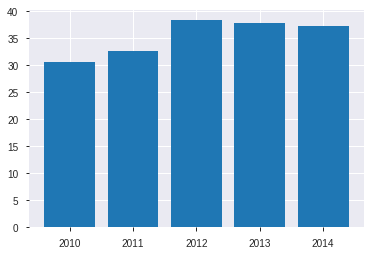

In [55]:
fossil_fuel = [fos_10, fos_11, fos_12, fos_13, fos_14]
green_fuel = [green_10, green_11, green_12, green_13, green_14]
index = [2010, 2011, 2012, 2013, 2014]
df4 = pd.DataFrame({'electricity from fossil fuel percentage': fossil_fuel
                    ,'electricity from renewable sources percentage': green_fuel
                   }, index=index)
plt.bar(df4.index, df4['electricity from fossil fuel percentage'])
plt.show()


### 

In [56]:
fossil_fuel = [fos_10, fos_11, fos_12, fos_13, fos_14]
green_fuel = [green_10, green_11, green_12, green_13, green_14]
index = [2010, 2011, 2012, 2013, 2014]
df4 = pd.DataFrame({'electricity from fossil fuel percentage': fossil_fuel
                    ,'electricity from renewable sources percentage': green_fuel
                   }, index=index)

df4

,electricity from fossil fuel percentage,electricity from renewable sources percentage
2010,30.628097,69.371903
2011,32.622222,67.377778
2012,38.342076,61.657924
2013,37.882615,62.117385
2014,37.340976,62.659024


#### visualisation of the analysis.

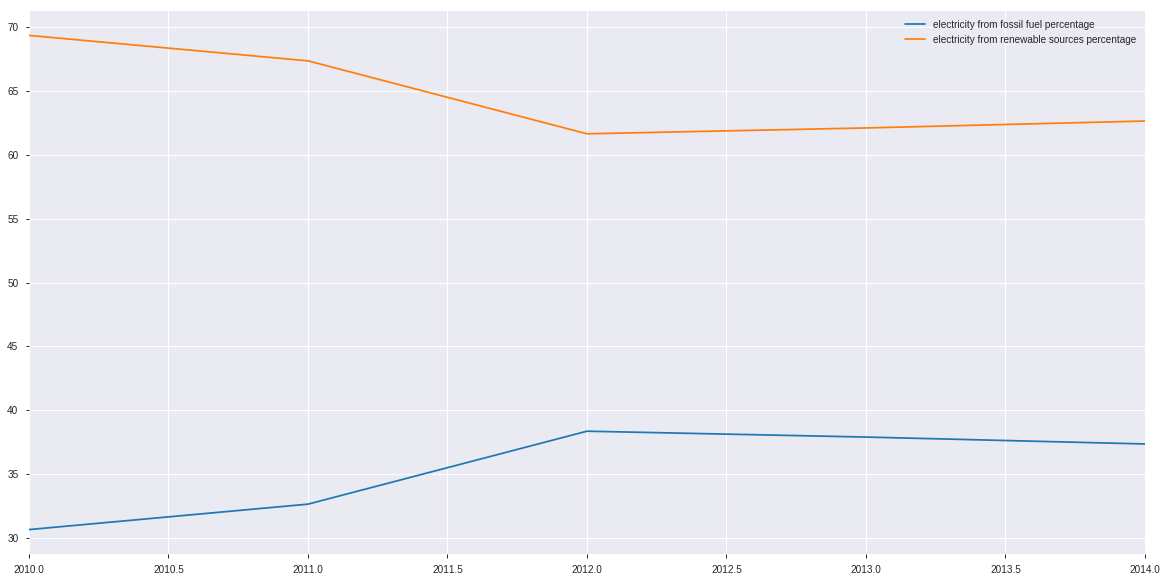

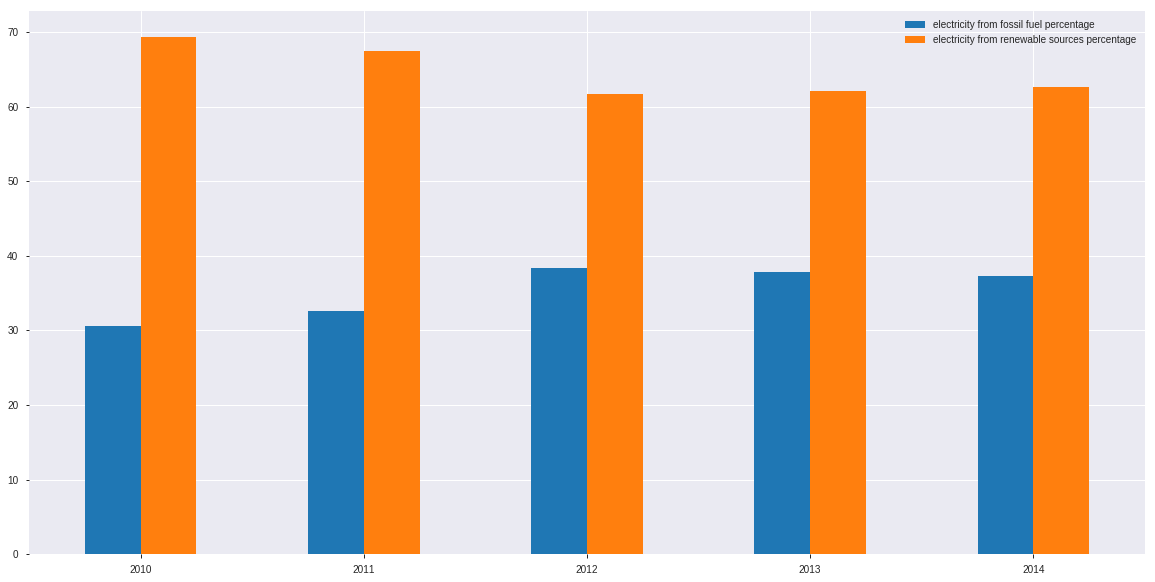

In [61]:
df4.plot(figsize=(20,10))
ax = df4.plot.bar(rot=0, figsize=(20,10))